# Realizar un pequeño análisis univariado de datos, teniendo en cuenta las características de las observaciones. Generar al menos 3 gráficos asociados.

In [45]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
import numpy as np
import scipy 

## Prices (dataset) - lineplot data por anio

In [50]:
prices = pd.read_csv('prices-split-adjusted.csv')
prices

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [67]:
prices['date']=pd.to_datetime(prices['date'])

<AxesSubplot:xlabel='date'>

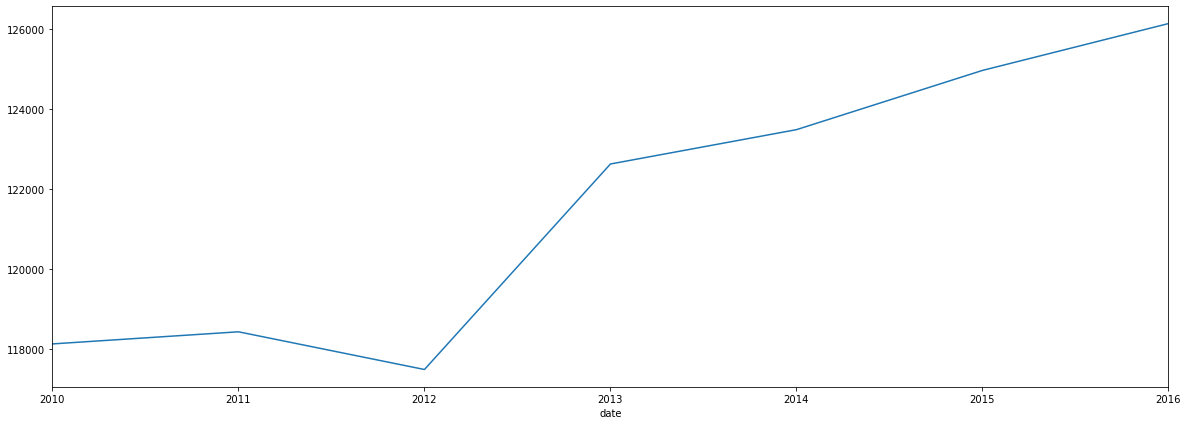

In [81]:
monthly_prices =prices.groupby(prices['date'].dt.to_period('Y')).size()
fig = plt.figure(figsize =(20, 7))
monthly_prices.plot.line()

In [74]:
scipy.stats.describe(monthly_prices)

DescribeResult(nobs=84, minmax=(8891, 11523), mean=10134.095238095239, variance=359453.1956397017, skewness=-0.08730619161903307, kurtosis=-0.6060180852337562)

In [75]:
scipy.stats.gmean(monthly_prices) # Media geometrica

10116.45328370534

In [76]:
scipy.stats.hmean(monthly_prices) # Media armonica

10098.695747590265

In [77]:
scipy.stats.mode(monthly_prices) # Moda

ModeResult(mode=array([9870]), count=array([9]))

## Securities (dataset) - Treemap/pyplot sub-sector industria de las empresas en el NYSE

In [46]:
securities = pd.read_csv('securities.csv')
securities

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877
...,...,...,...,...,...,...,...,...
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",NaN,1011006
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",NaN,1136869
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",NaN,109380


In [82]:
df_prueba = df[['GICS Sector','Ticker symbol']]
df2 = df_prueba.groupby('GICS Sector').agg('count')
#pie_borough = pie_borough.rename(columns={'DATE': 'Frecuencia'})
df2

,Ticker symbol
GICS Sector,
Consumer Discretionary,85
Consumer Staples,37
Energy,36
Financials,64
Health Care,59
Industrials,69
Information Technology,68
Materials,25
Real Estate,29


In [19]:
labels = df2.index

In [20]:
print(labels)

Index(['Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials',
       'Health Care', 'Industrials', 'Information Technology', 'Materials',
       'Real Estate', 'Telecommunications Services', 'Utilities'],
      dtype='object', name='GICS Sector')


In [30]:
df2 = df_prueba.groupby('GICS Sector').agg('count')
df2

,Ticker symbol
GICS Sector,
Consumer Discretionary,85
Consumer Staples,37
Energy,36
Financials,64
Health Care,59
Industrials,69
Information Technology,68
Materials,25
Real Estate,29


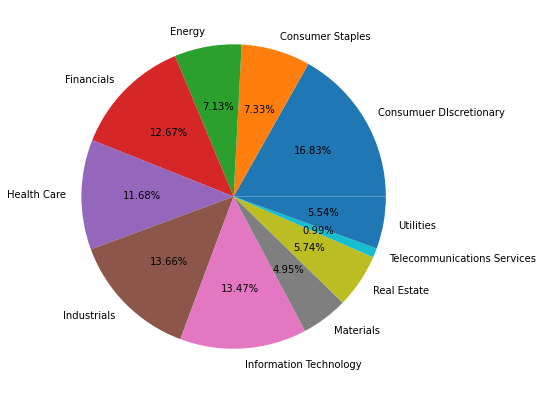

In [42]:
# Creating dataset
cars = ['Consumuer DIscretionary', 'Consumer Staples', 'Energy','Financials','Health Care','Industrials','Information Technology','Materials','Real Estate','Telecommunications Services','Utilities']
 
data = [85, 37, 36, 64, 59, 69,68,25,29,5,28]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = cars, autopct = "%0.2f%%")
 
# show plot
plt.show()

In [83]:
df_prueba=df[['GICS Sector','Ticker symbol']]
pie_borough = df_prueba.groupby('GICS Sector').agg('count')
pie_borough

import plotly.express as px
fig = px.pie(pie_borough, values='Ticker symbol', \
             names=pie_borough.index, title='Piechart Boroughs')
fig.show()

## Fundamentals (dataset)